<a href="https://colab.research.google.com/github/wesleybeckner/data_science_foundations/blob/main/notebooks/S2_Inferential_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Foundations <br> Session 2: Inferential Statistics

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

---

<br>

In this session we will look at the utility of EDA combined with inferential statistics.

<br>

---


<a name='x.0'></a>

## 2.0 Preparing Environment and Importing Data

[back to top](#top)

<a name='x.0.1'></a>

### 2.0.1 Import Packages

[back to top](#top)

In [2]:
# The modules we've seen before
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# our stats modules
import random
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy

<a name='x.0.2'></a>

### 2.0.2 Load Dataset

[back to top](#top)

For this session, we will use dummy datasets from sklearn.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/wesleybeckner/'\
                 'ds_for_engineers/main/data/truffle_margin/truffle_margin_customer.csv')

In [4]:
df

,Base Cake,Truffle Type,Primary Flavor,Secondary Flavor,Color Group,Customer,Date,KG,EBITDA/KG
0,Butter,Candy Outer,Butter Pecan,Toffee,Taupe,Slugworth,1/2020,53770.342593,0.500424
1,Butter,Candy Outer,Ginger Lime,Banana,Amethyst,Slugworth,1/2020,466477.578125,0.220395
2,Butter,Candy Outer,Ginger Lime,Banana,Burgundy,Perk-a-Cola,1/2020,80801.728070,0.171014
3,Butter,Candy Outer,Ginger Lime,Banana,White,Fickelgruber,1/2020,18046.111111,0.233025
4,Butter,Candy Outer,Ginger Lime,Rum,Amethyst,Fickelgruber,1/2020,19147.454268,0.480689
...,...,...,...,...,...,...,...,...,...
1663,Tiramisu,Chocolate Outer,Doughnut,Pear,Amethyst,Fickelgruber,12/2020,38128.802589,0.420111
1664,Tiramisu,Chocolate Outer,Doughnut,Pear,Burgundy,Zebrabar,12/2020,108.642857,0.248659
1665,Tiramisu,Chocolate Outer,Doughnut,Pear,Teal,Zebrabar,12/2020,3517.933333,0.378501
1666,Tiramisu,Chocolate Outer,Doughnut,Rock and Rye,Amethyst,Slugworth,12/2020,10146.898432,0.213149


In [5]:
descriptors = df.columns[:-2]

In [6]:
for col in df.columns[:-2]:
  print(col)
  print(df[col].unique())
  print()

Base Cake
['Butter' 'Cheese' 'Chiffon' 'Pound' 'Sponge' 'Tiramisu']

Truffle Type
['Candy Outer' 'Chocolate Outer' 'Jelly Filled']

Primary Flavor
['Butter Pecan' 'Ginger Lime' 'Margarita' 'Pear' 'Pink Lemonade'
 'Raspberry Ginger Ale' 'Sassafras' 'Spice' 'Wild Cherry Cream'
 'Cream Soda' 'Horchata' 'Kettle Corn' 'Lemon Bar' 'Orange Pineapple\tP'
 'Plum' 'Orange' 'Butter Toffee' 'Lemon' 'Acai Berry' 'Apricot'
 'Birch Beer' 'Cherry Cream Spice' 'Creme de Menthe' 'Fruit Punch'
 'Ginger Ale' 'Grand Mariner' 'Orange Brandy' 'Pecan' 'Toasted Coconut'
 'Watermelon' 'Wintergreen' 'Vanilla' 'Bavarian Cream' 'Black Licorice'
 'Caramel Cream' 'Cheesecake' 'Cherry Cola' 'Coffee' 'Irish Cream'
 'Lemon Custard' 'Mango' 'Sour' 'Amaretto' 'Blueberry' 'Butter Milk'
 'Chocolate Mint' 'Coconut' 'Dill Pickle' 'Gingersnap' 'Chocolate'
 'Doughnut']

Secondary Flavor
['Toffee' 'Banana' 'Rum' 'Tutti Frutti' 'Vanilla' 'Mixed Berry'
 'Whipped Cream' 'Apricot' 'Passion Fruit' 'Peppermint' 'Dill Pickle'
 'Black 

## 2.1 Many Flavors of Statistical Tests

<p align="center">
<img src="https://luminousmen.com/media/descriptive-and-inferential-statistics.jpeg" width=400px></img>
</p>

<small>[img src](https://luminousmen.com/post/descriptive-and-inferential-statistics)</small>


> Descriptive statistics describes data (for example, a chart or graph) and inferential statistics allows you to make predictions (“inferences”) from that data. With inferential statistics, you take data from samples and make generalizations about a population 

[statshowto](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/inferential-statistics/)

* Non-parametric tests
    * [Moods Median](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html) (Comparison of Medians)
    * [Kruskal-Wallis](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal)  (Comparison of Medians, compare to _ANOVA_)
    * [Mann Whitney](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu) (Rank order test, compare to _T-test_)
* Comparison of means
    * [T-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)
        * Independent
            * Equal Variances (students T-test)
            * Unequal Variances (Welch's T-test)
        * Dependent
* Comparison of variances
    * Analysis of Variance (ANOVA)
        * One Way ANOVA
        * Two Way ANOVA
        * MANOVA
        * Factorial ANOVA

When do I use each of these? We will talk about this as we proceed through the examples. [This page](https://support.minitab.com/en-us/minitab/20/help-and-how-to/statistics/nonparametrics/supporting-topics/which-test-should-i-use/) from minitab has good rules of thumb on the subject.



### 2.1.1 What is Mood's Median?

> You can use Chi-Square to test for a goodness of fit (whether a sample of data represents a distribution) or whether two variables are related (using a contingency table, which we will create below!)

**A special case of Pearon's Chi-Squared Test:** We create a table that counts the observations above and below the global median for **two or more groups**. We then perform a *chi-squared test of significance* on this *contingency table* 

Null hypothesis: the Medians are all equal

The chi-square test statistic:

$$x^2 = \sum{\frac{(O-E)^2}{E}}$$

Where \\(O\\) is the observed frequency and \\(E\\) is the expected frequency.

**Let's take an example**, say we have three shifts with the following production rates:

In [7]:
np.random.seed(7)
shift_one = [round(i) for i in np.random.normal(16, 3, 10)]
shift_two = [round(i) for i in np.random.normal(21, 3, 10)]

In [8]:
print(shift_one)
print(shift_two)

[21, 15, 16, 17, 14, 16, 16, 11, 19, 18]
[19, 20, 23, 20, 20, 17, 23, 21, 22, 16]


In [9]:
stat, p, m, table = scipy.stats.median_test(shift_one, shift_two, correction=False)

what is `median_test` returning?

In [10]:
print("The pearsons chi-square test statistic: {:.2f}".format(stat))
print("p-value of the test: {:.3f}".format(p))
print("the grand median: {}".format(m))

The pearsons chi-square test statistic: 7.20
p-value of the test: 0.007
the grand median: 18.5


Let's evaluate that test statistic ourselves by taking a look at the contingency table:

In [11]:
table

array([[2, 8],
       [8, 2]])

This is easier to make sense of if we order the shift times

In [12]:
shift_one.sort()
shift_one

[11, 14, 15, 16, 16, 16, 17, 18, 19, 21]

When we look at shift one, we see that 8 values are at or below the grand median.

In [13]:
shift_two.sort()
shift_two

[16, 17, 19, 20, 20, 20, 21, 22, 23, 23]

For shift two, only two are at or below the grand median.

Since the sample sizes are the same, the expected value for both groups is the same, 5 above and 5 below the grand median. The chi-square is then:

$$X^2 = \frac{(2-5)^2}{5} + \frac{(8-5)^2}{5} + \frac{(8-5)^2}{5} + \frac{(2-5)^2}{5}$$


In [14]:
(2-5)**2/5 + (8-5)**2/5 + (8-5)**2/5 + (2-5)**2/5

7.2

Our p-value, or the probability of observing the null-hypothsis, is under 0.05 (at 0.007). We can conclude that these shift performances were drawn under seperate distributions.

For comparison, let's do this analysis again with shifts of equal performances

In [15]:
np.random.seed(3)
shift_three = [round(i) for i in np.random.normal(16, 3, 10)]
shift_four = [round(i) for i in np.random.normal(16, 3, 10)]
stat, p, m, table = scipy.stats.median_test(shift_three, shift_four,
                                            correction=False)
print("The pearsons chi-square test statistic: {:.2f}".format(stat))
print("p-value of the test: {:.3f}".format(p))
print("the grand median: {}".format(m))

The pearsons chi-square test statistic: 0.00
p-value of the test: 1.000
the grand median: 15.5


and the shift raw values:

In [16]:
shift_three.sort()
shift_four.sort()
print(shift_three)
print(shift_four)

[10, 14, 15, 15, 15, 16, 16, 16, 17, 21]
[11, 12, 13, 14, 15, 16, 19, 19, 19, 21]


In [17]:
table

array([[5, 5],
       [5, 5]])

### 2.1.2 When to Use Mood's?

**Mood's Median Test is highly flexible** but has the following assumptions:

* Considers only one categorical factor
* Response variable is continuous (our shift rates)
* Data does not need to be normally distributed
  * But the distributions are similarly shaped
* Sample sizes can be unequal and small (less than 20 observations)

Other considerations:

* Not as powerful as Kruskal-Wallis Test but still useful for small sample sizes or when there are outliers

#### 🏋️ Exercise 1: Use Mood's Median Test


##### **Part A** Perform moods median test on Base Cake (Categorical Variable) and EBITDA/KG (Continuous Variable) in Truffle data

We're also going to get some practice with pandas groupby.

In [18]:
# what is returned by this groupby?
gp = df.groupby('Base Cake')

How do we find out? We could iterate through it:

In [19]:
# seems to be a tuple of some sort
for i in gp:
  print(i)
  break

('Butter',      Base Cake     Truffle Type Primary Flavor Secondary Flavor Color Group  \
0       Butter      Candy Outer   Butter Pecan           Toffee       Taupe   
1       Butter      Candy Outer    Ginger Lime           Banana    Amethyst   
2       Butter      Candy Outer    Ginger Lime           Banana    Burgundy   
3       Butter      Candy Outer    Ginger Lime           Banana       White   
4       Butter      Candy Outer    Ginger Lime              Rum    Amethyst   
...        ...              ...            ...              ...         ...   
1562    Butter  Chocolate Outer           Plum     Black Cherry        Opal   
1563    Butter  Chocolate Outer           Plum     Black Cherry       White   
1564    Butter  Chocolate Outer           Plum            Mango       Black   
1565    Butter     Jelly Filled         Orange         Cucumber    Amethyst   
1566    Butter     Jelly Filled         Orange         Cucumber    Burgundy   

             Customer     Date          

In [20]:
# the first object appears to be the group
print(i[0])

# the second object appears to be the df belonging to that group
print(i[1])

Butter
     Base Cake     Truffle Type Primary Flavor Secondary Flavor Color Group  \
0       Butter      Candy Outer   Butter Pecan           Toffee       Taupe   
1       Butter      Candy Outer    Ginger Lime           Banana    Amethyst   
2       Butter      Candy Outer    Ginger Lime           Banana    Burgundy   
3       Butter      Candy Outer    Ginger Lime           Banana       White   
4       Butter      Candy Outer    Ginger Lime              Rum    Amethyst   
...        ...              ...            ...              ...         ...   
1562    Butter  Chocolate Outer           Plum     Black Cherry        Opal   
1563    Butter  Chocolate Outer           Plum     Black Cherry       White   
1564    Butter  Chocolate Outer           Plum            Mango       Black   
1565    Butter     Jelly Filled         Orange         Cucumber    Amethyst   
1566    Butter     Jelly Filled         Orange         Cucumber    Burgundy   

             Customer     Date             K

going back to our diagram from our earlier pandas session. It looks like whenever we split in the groupby method, we create separate dataframes as well as their group label:

<img src="https://swcarpentry.github.io/r-novice-gapminder/fig/12-plyr-fig1.png" width=500></img>

Ok, so we know `gp` is separate dataframes. How do we turn them into arrays to then pass to `median_test`?

In [21]:
# complete this for loop
for i, j in gp:
  pass
  # turn 'EBITDA/KG' of j into an array using the .values attribute
  # print this to the screen

After you've completed the previous step, turn this into a list comprehension and pass the result to a variable called `margins`

In [22]:
# complete the code below
# margins = [# YOUR LIST COMPREHENSION HERE]

Remember the list unpacking we did for the tic tac toe project? We're going to do the same thing here. Unpack the margins list for `median_test` and run the cell below!

In [23]:
# complete the following line
# stat, p, m, table = scipy.stats.median_test(<UNPACK MARGINS HERE>, correction=False)

print("The pearsons chi-square test statistic: {:.2f}".format(stat))
print("p-value of the test: {:.2e}".format(p))
print("the grand median: {:.2e}".format(m))

The pearsons chi-square test statistic: 0.00
p-value of the test: 1.00e+00
the grand median: 1.55e+01


##### **Part B** View the distributions of the data using matplotlib and seaborn

What a fantastic statistical result we found! Can we affirm our result with some visualizations? I hope so! Create a boxplot below using pandas. In your call to `df.boxplot()` the `by` parameter should be set to `Base Cake` and the `column` parameter should be set to `EBITDA/KG`

In [24]:
# YOUR BOXPLOT HERE

For comparison, I've shown the boxplot below using seaborn!

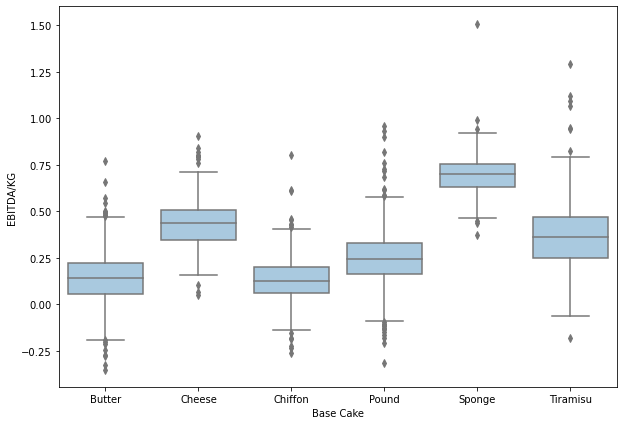

In [25]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(x='Base Cake', y='EBITDA/KG', data=df, color='#A0cbe8')

##### **Part C** Perform Moods Median on all the other groups

In [26]:
# Recall the other descriptors we have
descriptors

Index(['Base Cake', 'Truffle Type', 'Primary Flavor', 'Secondary Flavor',
       'Color Group', 'Customer', 'Date'],
      dtype='object')

In [27]:
for desc in descriptors:

  # YOUR CODE FORM MARGINS BELOW
  # margins = [<YOUR LIST COMPREHENSION>]

  # UNPACK MARGINS INTO MEDIAN_TEST
  # stat, p, m, table = scipy.stats.median_test(<YOUR UNPACKING METHOD>, correction=False)
  print(desc)
  print("The pearsons chi-square test statistic: {:.2f}".format(stat))
  print("p-value of the test: {:e}".format(p))
  print("the grand median: {}".format(m), end='\n\n')

Base Cake
The pearsons chi-square test statistic: 0.00
p-value of the test: 1.000000e+00
the grand median: 15.5

Truffle Type
The pearsons chi-square test statistic: 0.00
p-value of the test: 1.000000e+00
the grand median: 15.5

Primary Flavor
The pearsons chi-square test statistic: 0.00
p-value of the test: 1.000000e+00
the grand median: 15.5

Secondary Flavor
The pearsons chi-square test statistic: 0.00
p-value of the test: 1.000000e+00
the grand median: 15.5

Color Group
The pearsons chi-square test statistic: 0.00
p-value of the test: 1.000000e+00
the grand median: 15.5

Customer
The pearsons chi-square test statistic: 0.00
p-value of the test: 1.000000e+00
the grand median: 15.5

Date
The pearsons chi-square test statistic: 0.00
p-value of the test: 1.000000e+00
the grand median: 15.5



##### **Part D** Many boxplots

And finally, we will confirm these visually. Complete the Boxplot for each group:

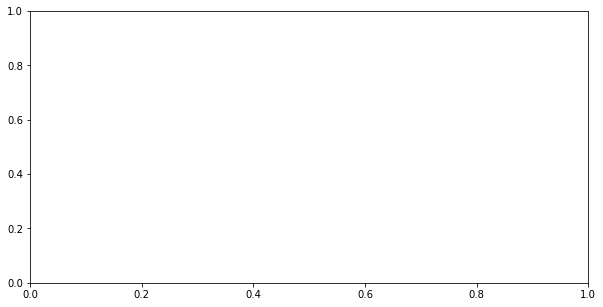

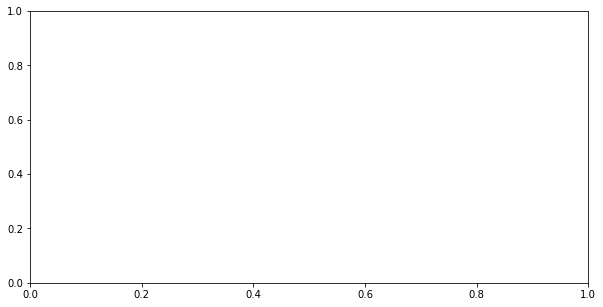

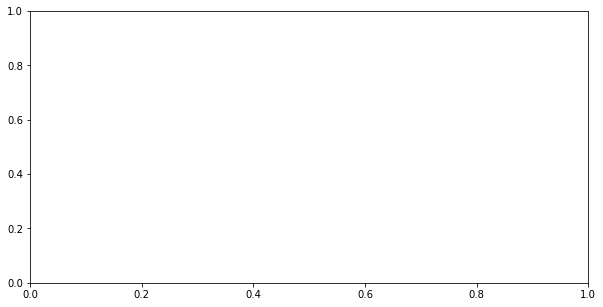

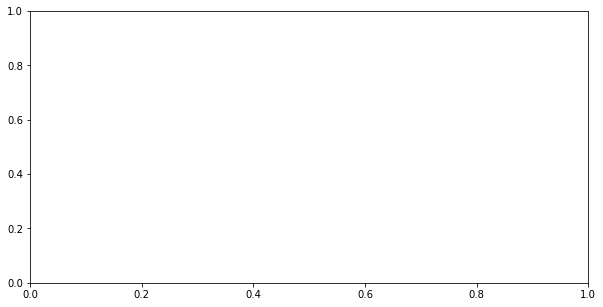

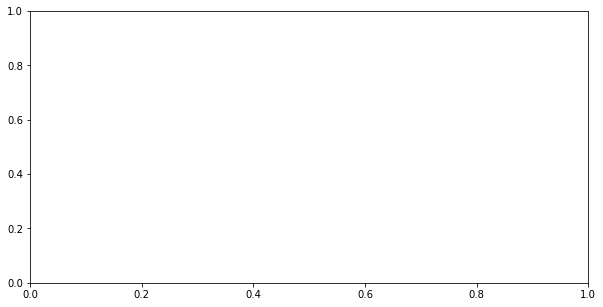

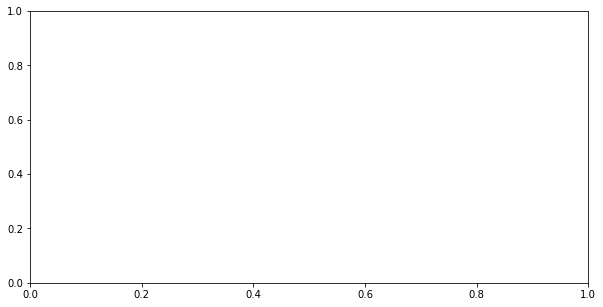

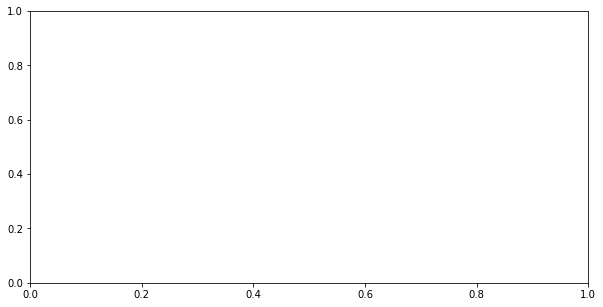

In [28]:
for desc in descriptors:
  fig, ax = plt.subplots(figsize=(10,5))
  # sns.boxplot(x=<YOUR X VARIABLE HERE>, y='EBITDA/KG', data=df, color='#A0cbe8', ax=ax)

### 2.1.3 What is a T-test?

There are 1-sample and 2-sample T-tests 

_(note: we would use a 1-sample T-test just to determine if the sample mean is equal to a hypothesized population mean)_

Within 2-sample T-tests we have **_independent_** and **_dependent_** T-tests (uncorrelated or correlated samples)

For independent, two-sample T-tests:

* **_Equal variance_** (or pooled) T-test
    * `scipy.stats.ttest_ind(equal_var=True)`
    * also called ***Student's T-test***
* **_Unequal variance_** T-test
    * `scipy.stats.ttest_ind(equal_var=False)`
    * also called ***Welch's T-test***

<br>

For dependent T-tests:

* Paired (or correlated) T-test
    * `scipy.stats.ttest_rel`
    * _ex_: patient symptoms before and after treatment

A full discussion on T-tests is outside the scope of this session, but we can refer to wikipedia for more information, including formulas on how each statistic is computed:

* [student's T-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples)

#### 2.1.3.1 Demonstration of T-tests

[back to top](#top)

We'll assume our shifts are of **_equal variance_** and proceed with the appropriate **_independent two-sample_** T-test...

In [29]:
print(shift_one)
print(shift_two)

[11, 14, 15, 16, 16, 16, 17, 18, 19, 21]
[16, 17, 19, 20, 20, 20, 21, 22, 23, 23]


To calculate the T-test, we follow a slightly different statistical formula:

$$T=\frac{\mu_1 - \mu_2}{s\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

where \\(\mu\\) are the means of the two groups, \\(n\\) are the sample sizes and \\(s\\) is the pooled standard deviation, also known as the cummulative variance (depending on if you square it or not):

$$s= \sqrt{\frac{(n_1-1)\sigma_1^2 + (n_2-1)\sigma_2^2}{n_1 + n_2 - 2}}$$

where \\(\sigma\\) are the standard deviations. What you'll notice here is we are combining the two variances, we can only do this if we assume the variances are somewhat equal, this is known as the *equal variances* t-test.

In [30]:
mean_shift_one = np.mean(shift_one)
mean_shift_two = np.mean(shift_two)

print(mean_shift_one, mean_shift_two)

16.3 20.1


In [31]:
com_var = ((np.sum([(i - mean_shift_one)**2 for i in shift_one]) + 
            np.sum([(i - mean_shift_two)**2 for i in shift_two])) /
            (len(shift_one) + len(shift_two)-2))
print(com_var)

6.5


In [32]:
T = (np.abs(mean_shift_one - mean_shift_two) / (
     np.sqrt(com_var/len(shift_one) +
     com_var/len(shift_two))))

In [33]:
T

3.3328204733667115

We see that this hand-computed result matches that of the `scipy` module:

In [34]:
scipy.stats.ttest_ind(shift_two, shift_one, equal_var=True)

Ttest_indResult(statistic=3.3328204733667115, pvalue=0.0037029158660758575)

### 2.1.4 What are F-statistics and the F-test?

The F-statistic is simply a ratio of two variances, or the ratio of _mean squares_

_mean squares_ is the estimate of population variance that accounts for the degrees of freedom to compute that estimate. 

We will explore this in the context of ANOVA

#### 2.1.4.1 What is Analysis of Variance? 

ANOVA uses the F-test to determine whether the variability between group means is larger than the variability within the groups. If that statistic is large enough, you can conclude that the means of the groups are not equal.

**The caveat is that ANOVA tells us whether there is a difference in means but it does not tell us where the difference is.** To find where the difference is between the groups, we have to conduct post-hoc tests.

There are two main types:

* One-way (one factor) and
* Two-way (two factor) where factor is an independent variable

<br>

| Ind A | Ind B | Dep |
|-------|-------|-----|
| X     | H     | 10  |
| X     | I     | 12  |
| Y     | I     | 11  |
| Y     | H     | 20  |

<br>

##### ANOVA Hypotheses

* _Null hypothesis_: group means are equal
* _Alternative hypothesis_: at least one group mean is different from the other groups

##### ANOVA Assumptions

* Residuals (experimental error) are normally distributed (test with Shapiro-Wilk)
* Homogeneity of variances (variances are equal between groups) (test with Bartlett's)
* Observations are sampled independently from each other
* _Note: ANOVA assumptions can be checked using test statistics (e.g. Shapiro-Wilk, Bartlett’s, Levene’s test) and the visual approaches such as residual plots (e.g. QQ-plots) and histograms._

##### Steps for ANOVA

* Check sample sizes: equal observations must be in each group
* Calculate Sum of Square between groups and within groups (\\(SS_B, SS_E\\))
* Calculate Mean Square between groups and within groups (\\(MS_B, MS_E\\))
* Calculate F value (\\(MS_B/MS_E\\))

<br>

This might be easier to see in a table:

<br>

| Source of Variation         | degree of freedom (Df) | Sum of squares (SS) | Mean square (MS)   | F value     |
|-----------------------------|------------------------|---------------------|--------------------|-------------|
| Between Groups             | Df_b = P-1             | SS_B                | MS_B = SS_B / Df_B | MS_B / MS_E |
| Within Groups | Df_E = P(N-1)          | SS_E                | MS_E = SS_E / Df_E |             |
| total                       | Df_T = PN-1            | SS_T           |                    |             |

Where:
$$ SS_B = \sum_{i}^{P}{(\bar{y}_i-\bar{y})^2} $$
<br>
$$ SS_E = \sum_{ik}^{PN}{(\bar{y}_{ik}-\bar{y}_i)^2} $$
<br>
$$ SS_T = SS_B + SS_E $$

Let's go  back to our shift data to take an example:

<AxesSubplot:>

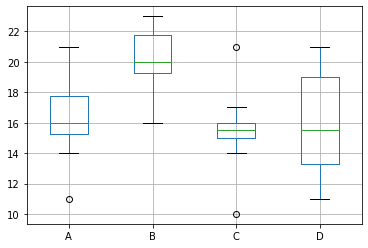

In [35]:
shifts = pd.DataFrame([shift_one, shift_two, shift_three, shift_four]).T
shifts.columns = ['A', 'B', 'C', 'D']
shifts.boxplot()

#### 2.1.4.2 SNS Boxplot

this is another great way to view boxplot data. Notice how sns also shows us the raw data alongside the box and whiskers using a _swarmplot_.

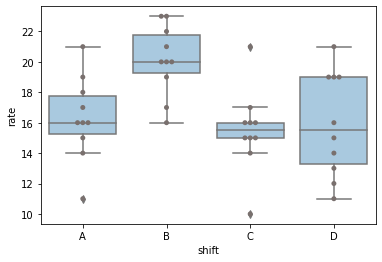

In [36]:
shift_melt = pd.melt(shifts.reset_index(), id_vars=['index'], 
                     value_vars=['A', 'B', 'C', 'D'])
shift_melt.columns = ['index', 'shift', 'rate']
ax = sns.boxplot(x='shift', y='rate', data=shift_melt, color='#A0cbe8')
ax = sns.swarmplot(x="shift", y="rate", data=shift_melt, color='#79706e')

Anyway back to ANOVA...

In [37]:
fvalue, pvalue = stats.f_oneway(shifts['A'], 
                                shifts['B'],
                                shifts['C'],
                                shifts['D'])
print(fvalue, pvalue)

5.599173553719008 0.0029473487978665873


We can get this in the format of the table we saw above:

In [38]:
# get ANOVA table 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('rate ~ C(shift)', data=shift_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)

,sum_sq,df,F,PR(>F)
C(shift),135.5,3.0,5.599174,0.002947
Residual,290.4,36.0,NaN,NaN


The **_Shapiro-Wilk_** test can be used to check the _normal distribution of residuals_. Null hypothesis: data is drawn from normal distribution.

In [39]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9750654697418213 0.5121709108352661


We can use **_Bartlett’s_** test to check the _Homogeneity of variances_. Null hypothesis: samples from populations have equal variances.

In [40]:
w, pvalue = stats.bartlett(shifts['A'], 
                           shifts['B'], 
                           shifts['C'], 
                           shifts['D'])
print(w, pvalue)

1.3763632854696672 0.711084540821183


#### 2.1.4.3 ANOVA Interpretation

The _p_ value form ANOVA analysis is significant (_p_ < 0.05) and we can conclude there are significant difference between the shifts. But we do not know which shift(s) are different. For this we need to perform a post hoc test. There are a multitude of these that are beyond the scope of this discussion ([Tukey-kramer](https://www.real-statistics.com/one-way-analysis-of-variance-anova/unplanned-comparisons/tukey-kramer-test/) is one such test) 

<p align=center>
<img src="https://media.tenor.com/images/4da4d46c8df02570a9a1219cac42bf27/tenor.gif"></img>
</p>

### 2.1.5 Putting it all together

In summary, there are many statistical tests at our disposal when performing inferential statistical analysis. In times like these, a simple decision tree can be extraordinarily useful!

<img src="https://cdn.scribbr.com/wp-content/uploads//2020/01/flowchart-for-choosing-a-statistical-test.png" width=800px></img>

<small>source: [scribbr](https://www.scribbr.com/statistics/statistical-tests/)</small>

## 🍒 2.2 Enrichment: Evaluate statistical significance of product margin: a snake in the garden

### 2.2.1 Mood's Median on product descriptors

The first issue we run into with moods is... what? 

Since Mood's is nonparametric, we can easily become overconfident in our results. Let's take an example, continuing with the `Truffle Type` column. Recall that there are 3 unique Truffle Types:

In [41]:
df['Truffle Type'].unique()

array(['Candy Outer', 'Chocolate Outer', 'Jelly Filled'], dtype=object)

We can loop through each group and compute the:

* Moods test (comparison of medians)
* Welch's T-test (unequal variances, comparison of means) 
* Shapiro-Wilk test for normality

In [73]:
col = 'Truffle Type'
moodsdf = pd.DataFrame()
confidence_level = 0.01
welch_rej = mood_rej = shapiro_rej = False
for truff in df[col].unique():
  
  # for each 
  group = df.loc[df[col] == truff]['EBITDA/KG']
  pop = df.loc[~(df[col] == truff)]['EBITDA/KG']
  stat, p, m, table = scipy.stats.median_test(group, pop)
  if p < confidence_level:
        mood_rej = True
  median = np.median(group)
  mean = np.mean(group)
  size = len(group)
  print("{}: N={}".format(truff, size))
  print("Moods Median Test")
  print("\tstatistic={:.2f}, pvalue={:.2e}".format(stat, p), end="\n")
  print(f"\treject: {mood_rej}")
  print("Welch's T-Test")
  print("\tstatistic={:.2f}, pvalue={:.2e}".format(*scipy.stats.ttest_ind(group, pop, equal_var=False)))
  welchp = scipy.stats.ttest_ind(group, pop, equal_var=False).pvalue
  if welchp < confidence_level:
        welch_rej = True
  print(f"\treject: {welch_rej}")
  print("Shapiro-Wilk")
  print("\tstatistic={:.2f}, pvalue={:.2e}".format(*stats.shapiro(group)))
  if stats.shapiro(group).pvalue < confidence_level:
    shapiro_rej = True
  print(f"\treject: {shapiro_rej}")
  print(end="\n\n")
  moodsdf = pd.concat([moodsdf, 
                            pd.DataFrame([truff, 
                                          stat, p, m, mean, median, size,
                                          welchp, table]).T])
moodsdf.columns = [col, 'pearsons_chi_square', 'p_value', 
              'grand_median', 'group_mean', 'group_median', 'size', 'welch p',
              'table']

Candy Outer: N=288
Moods Median Test
	statistic=1.52, pvalue=2.18e-01
	reject: False
Welch's T-Test
	statistic=-2.76, pvalue=5.91e-03
	reject: True
Shapiro-Wilk
	statistic=0.96, pvalue=2.74e-07
	reject: True


Chocolate Outer: N=1356
Moods Median Test
	statistic=6.63, pvalue=1.00e-02
	reject: False
Welch's T-Test
	statistic=4.41, pvalue=1.19e-05
	reject: True
Shapiro-Wilk
	statistic=0.96, pvalue=6.30e-19
	reject: True


Jelly Filled: N=24
Moods Median Test
	statistic=18.64, pvalue=1.58e-05
	reject: True
Welch's T-Test
	statistic=-8.41, pvalue=7.93e-09
	reject: True
Shapiro-Wilk
	statistic=0.87, pvalue=6.56e-03
	reject: True




### 🙋‍♀️ Question 1: Moods Results on Truffle Type

What can we say about these results? 

Recall that:

* Shapiro-Wilk Null Hypothesis: the distribution is normal
* Welch's T-test: requires that the distributions be normal
* Moods test: does not require normality in distributions

> main conclusions: all the groups are non-normal and therefore welch's test is invalid. We saw that the Welch's test had much lower p-values than the Moods median test. This is good news! It means that our Moods test, while allowing for non-normality, is much more conservative in its test-statistic, and therefore was unable to reject the null hypothesis in the cases of the chocolate outer and candy outer groups

We can go ahead and repeat this analysis for all of our product categories:

In [45]:
df.columns[:5]

Index(['Base Cake', 'Truffle Type', 'Primary Flavor', 'Secondary Flavor',
       'Color Group'],
      dtype='object')

In [69]:
moodsdf = pd.DataFrame()
for col in df.columns[:5]:
  for truff in df[col].unique():
    group = df.loc[df[col] == truff]['EBITDA/KG']
    pop = df.loc[~(df[col] == truff)]['EBITDA/KG']
    stat, p, m, table = scipy.stats.median_test(group, pop)
    median = np.median(group)
    mean = np.mean(group)
    size = len(group)
    welchp = scipy.stats.ttest_ind(group, pop, equal_var=False).pvalue
    moodsdf = pd.concat([moodsdf, 
                              pd.DataFrame([col, truff, 
                                            stat, p, m, mean, median, size,
                                            welchp, table]).T])
moodsdf.columns = ['descriptor', 'group', 'pearsons_chi_square', 'p_value', 
                'grand_median', 'group_mean', 'group_median', 'size', 'welch p',
                'table']
print(moodsdf.shape)

(101, 10)


In [72]:
moodsdf = moodsdf.loc[(moodsdf['p_value'] < confidence_level)].sort_values('group_median')

moodsdf = moodsdf.sort_values('group_median').reset_index(drop=True)
print(moodsdf.shape)

(57, 10)


In [71]:
moodsdf

,descriptor,group,pearsons_chi_square,p_value,grand_median,group_mean,group_median,size,welch p,table
0,Secondary Flavor,Wild Cherry Cream,6.798913,0.009121,0.216049,-0.122491,-0.15791,12,0.00001,"[[1, 833], [11, 823]]"
1,Primary Flavor,Lemon Bar,6.798913,0.009121,0.216049,-0.122491,-0.15791,12,0.00001,"[[1, 833], [11, 823]]"
2,Primary Flavor,Orange Pineapple\tP,18.643248,0.000016,0.216049,0.016747,0.002458,24,0.0,"[[1, 833], [23, 811]]"
3,Secondary Flavor,Papaya,18.643248,0.000016,0.216049,0.016747,0.002458,24,0.0,"[[1, 833], [23, 811]]"
4,Primary Flavor,Cherry Cream Spice,10.156401,0.001438,0.216049,0.018702,0.009701,12,0.000001,"[[0, 834], [12, 822]]"
5,Secondary Flavor,Cucumber,18.643248,0.000016,0.216049,0.051382,0.017933,24,0.0,"[[1, 833], [23, 811]]"
6,Truffle Type,Jelly Filled,18.643248,0.000016,0.216049,0.051382,0.017933,24,0.0,"[[1, 833], [23, 811]]"
7,Primary Flavor,Orange,18.643248,0.000016,0.216049,0.051382,0.017933,24,0.0,"[[1, 833], [23, 811]]"
8,Primary Flavor,Toasted Coconut,15.261253,0.000094,0.216049,0.037002,0.028392,24,0.0,"[[2, 832], [22, 812]]"
9,Primary Flavor,Wild Cherry Cream,6.798913,0.009121,0.216049,0.047647,0.028695,12,0.00038,"[[1, 833], [11, 823]]"


### 🍒🍒 2.2.2 **Enrichment**: Broad Analysis of Categories: ANOVA



Recall our "melted" shift data. It will be useful to think of getting our Truffle data in this format:

In [49]:
shift_melt.head()

,index,shift,rate
0,0,A,15
1,1,A,15
2,2,A,15
3,3,A,16
4,4,A,17


In [50]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '_')

In [51]:
# get ANOVA table 
# Ordinary Least Squares (OLS) model
model = ols('EBITDA_KG ~ C(Truffle_Type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)

,sum_sq,df,F,PR(>F)
C(Truffle_Type),1.250464,2.0,12.882509,0.000003
Residual,80.808138,1665.0,NaN,NaN


Recall the **_Shapiro-Wilk_** test can be used to check the _normal distribution of residuals_. Null hypothesis: data is drawn from normal distribution.

In [52]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9576056599617004 1.2598073820281984e-21


And the **_Bartlett’s_** test to check the _Homogeneity of variances_. Null hypothesis: samples from populations have equal variances.

In [53]:
gb = df.groupby('Truffle_Type')['EBITDA_KG']
gb

In [54]:
w, pvalue = stats.bartlett(*[gb.get_group(x) for x in gb.groups])
print(w, pvalue)

109.93252546442552 1.344173733366234e-24


Wow it looks like our data is not drawn from a normal distribution! Let's check this for other categories...

We can wrap these in a for loop:

In [55]:
for col in df.columns[:5]:
  print(col)
  model = ols('EBITDA_KG ~ C({})'.format(col), data=df).fit()
  anova_table = sm.stats.anova_lm(model, typ=2)
  display(anova_table)
  w, pvalue = stats.shapiro(model.resid)
  print("Shapiro: ", w, pvalue)
  gb = df.groupby(col)['EBITDA_KG']
  w, pvalue = stats.bartlett(*[gb.get_group(x) for x in gb.groups])
  print("Bartlett: ", w, pvalue)
  print()

Base_Cake


,sum_sq,df,F,PR(>F)
C(Base_Cake),39.918103,5.0,314.869955,1.889884e-237
Residual,42.140500,1662.0,NaN,NaN


Shapiro:  0.9634131193161011 4.1681337029688696e-20
Bartlett:  69.83288886114195 1.1102218566053728e-13

Truffle_Type


,sum_sq,df,F,PR(>F)
C(Truffle_Type),1.250464,2.0,12.882509,0.000003
Residual,80.808138,1665.0,NaN,NaN


Shapiro:  0.9576056599617004 1.2598073820281984e-21
Bartlett:  109.93252546442552 1.344173733366234e-24

Primary_Flavor


,sum_sq,df,F,PR(>F)
C(Primary_Flavor),50.270639,50.0,51.143649,1.153434e-292
Residual,31.787964,1617.0,NaN,NaN


Shapiro:  0.948470413684845 9.90281706784179e-24
Bartlett:  210.15130419114894 1.5872504991231547e-21

Secondary_Flavor


,sum_sq,df,F,PR(>F)
C(Secondary_Flavor),15.088382,28.0,13.188089,1.929302e-54
Residual,66.970220,1639.0,NaN,NaN


Shapiro:  0.9548103213310242 2.649492974953278e-22
Bartlett:  420.6274502894803 1.23730070350945e-71

Color_Group


,sum_sq,df,F,PR(>F)
C(Color_Group),16.079685,11.0,36.689347,6.544980e-71
Residual,65.978918,1656.0,NaN,NaN


Shapiro:  0.969061017036438 1.8926407335144587e-18
Bartlett:  136.55525281340468 8.164787784033709e-24



### 🍒🍒 2.2.3 **Enrichment**: Visual Analysis of Residuals: QQ-Plots

This can be distressing and is often why we want visual methods to see what is going on with our data!

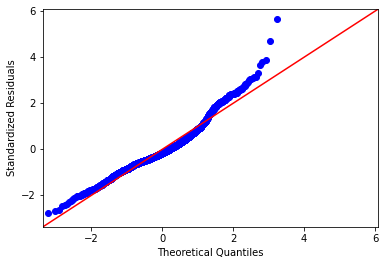

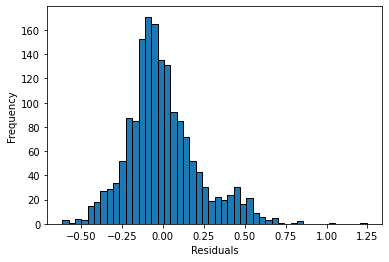

In [56]:
model = ols('EBITDA_KG ~ C(Truffle_Type)', data=df).fit()

#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(standardized_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(model.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

We see that a lot of our data is swayed by extremely high and low values, so what can we conclude? 

> You need the right test statistic for the right job, in this case, we are littered with unequal variance in our groupings so we use the moods median and welch (unequal variance t-test) to make conclusions about our data


# References

* [Renesh Bedre ANOVA](https://www.reneshbedre.com/blog/anova.html)
* [Minitab ANOVA](https://blog.minitab.com/en/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test)
* [Analytics Vidhya ANOVA](https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/)
* [Renesh Bedre Hypothesis Testing](https://www.reneshbedre.com/blog/hypothesis-testing.html)
* [Real Statistics Turkey-kramer](https://www.real-statistics.com/one-way-analysis-of-variance-anova/unplanned-comparisons/tukey-kramer-test/)
* [Mutual Information](https://www.kaggle.com/ryanholbrook/mutual-information)